In [231]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.layers import Input, LSTM, RepeatVector
from keras.models import Model

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

from sklearn.ensemble import IsolationForest

from sklearn.svm import OneClassSVM

from reportlab.lib.pagesizes import A4
from reportlab.lib.units import inch
from reportlab.pdfgen import canvas
from reportlab.lib import colors
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.platypus import Table, TableStyle
from joblib import load

from sklearn.metrics import classification_report

import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import confusion_matrix
from keras.models import model_from_json

In [259]:
filePath = "C:/Users/raul.blanco/Documents/4 - Personales/UBA/Repositorios/IA/Trabajo-Final/test_data.csv"
test_data = pd.read_csv(filepath_or_buffer=filePath, header=0, sep=",")
test_timedelta = test_data[['timedelta']]

filePath = "C:/Users/raul.blanco/Documents/4 - Personales/UBA/Repositorios/IA/Trabajo-Final/y_full.csv"
y_full = pd.read_csv(filepath_or_buffer=filePath, header=0, sep=",")
y = y_full['class']
y_full = y_full.to_numpy()

test_data = test_data.drop(['Unnamed: 0',"timedelta"], axis=1)
test_data = test_data.to_numpy()

In [260]:
select = int(input("Presione 1 para LSTM Autoencoder, 2 para Restricted Boltzmann Machine, 3 para Isolation Forest, 4 para Support Vector Machines: "))

In [261]:
if select == 1:
    json_file = open('model_LSTM.json', 'r')
    loaded_model_json = json_file.read()
    
    json_file.close()
    model = model_from_json(loaded_model_json)
    # se cargan los pesos (weights) en el nuevo modelo
    model.load_weights("model_LSTM.h5")
    print("Modelo cargado desde el PC")
    #model = load('model_autoencoder.joblib')
    test_data_LSTM = test_data.reshape(test_data.shape[0],1,test_data.shape[1])
    predictions_LSTM = model.predict(test_data_LSTM)

    threshold_LSTM = float(input("Modelo LSTM Autoencoder. Ingrese el Threshold a utilizar: "))

    predictions_LSTM[predictions_LSTM >= threshold_LSTM] = 1
    predictions_LSTM[predictions_LSTM < threshold_LSTM] = 0
    predictions_LSTM = predictions_LSTM.reshape(predictions_LSTM.shape[0], predictions_LSTM.shape[2])

    test_data = test_data.reshape(test_data_LSTM.shape[0], test_data_LSTM.shape[2])
    confusion_matrix = pd.crosstab(y_full[:, -1], predictions_LSTM[:, 10], rownames=['Actual'], colnames=['Predicted'])
    print(confusion_matrix)

    pd_predictions_LSTM = pd.DataFrame(predictions_LSTM)

    column_10 = predictions_LSTM[:, 10]
    is_one_LSTM = column_10 ==1

    # Asignar 1 a los elementos que sean True y 0 a los elementos que sean False
    has_ones_LSTM = np.where(is_one_LSTM, 1, 0)

    has_ones_LSTM_pd = pd.DataFrame(has_ones_LSTM, columns=['class'])
    count = (has_ones_LSTM_pd['class'] == 1).sum()
    count1 = (has_ones_LSTM_pd['class'] == 0).sum()
    print(f'El número de anomalias es {count} y {count1} son valores normales')

    new_column_LSTM = has_ones_LSTM

    # Agregar la nueva columna al final del ndarray original
    predictions_class = np.hstack((predictions_LSTM, new_column_LSTM.reshape(-1, 1)))

    pd_predictions_LSTM = pd.DataFrame(predictions_class)

    pd_test_data = pd.DataFrame(test_data)

    print(classification_report(predictions_class[:,14], y))

    y_pd = pd.DataFrame(y, columns = ['class'])

    auc = roc_auc_score(clase, predictions_class[:,14])

elif select == 2:
    #model = load('model_rbm.joblib')
    json_file = open('model_rbm.json', 'r')
    loaded_model_json = json_file.read()
    
    json_file.close()
    model = model_from_json(loaded_model_json)
    # se cargan los pesos (weights) en el nuevo modelo
    model.load_weights("model_rbm.h5")
    print("Modelo cargado desde el PC")
    predictions = model.predict(test_data)

    threshold_rbm = float(input("Modelo Restricted Boltzmann Machine. Ingrese el Threshold a utilizar: "))
    predictions[predictions >= threshold_rbm] = 1
    predictions[predictions < threshold_rbm] = 0

    confusion_matrix = pd.crosstab(y_full[:, -1], predictions[:, 10], rownames=['Actual'], colnames=['Predicted'])
    print(confusion_matrix)

    pd_predictions = pd.DataFrame(predictions)
    column_10_rbm = predictions[:, 10]
    #is_one_rbm = column_10_rbm ==1
    # Asignar 1 a los elementos que sean True y 0 a los elementos que sean False
    has_ones_rbm = np.where(column_10_rbm == 1, 1, 0)

    has_ones_rbm_pd = pd.DataFrame(has_ones_rbm, columns=['class'])
    count = (has_ones_rbm_pd['class'] == 1).sum()
    count1 = (has_ones_rbm_pd['class'] == 0).sum()
    print(f'El número de anomalias predecidas es {count} y {count1} son valores normales')

    new_column_rbm = has_ones_rbm

    pd_predictions = np.hstack((predictions, new_column_rbm.reshape(-1, 1)))

    pd_predictions = pd.DataFrame(predictions, columns = ['1','2','3','4','5','6','7','8','9','10','11','12','13','class'] )

    y_pd = pd.DataFrame(y, columns = ['class'])

    auc = roc_auc_score(clase, pd_predictions['class'])


elif select == 3:
    model = load('model_if.joblib')
    predictions = model.predict(test_data)

    threshold_if = float(input("Modelo Restricted Boltzmann Machine. Ingrese el Threshold a utilizar: "))

    predictions[predictions >= threshold_if] = 1
    predictions[predictions < threshold_if] = 0

    confusion_matrix = pd.crosstab(y_full[:, -1], predictions, rownames=['Actual'], colnames=['Predicted'])
    print(confusion_matrix)

    pd_predictions = pd.DataFrame(predictions, columns=['class'])
    count = (pd_predictions['class'] == 1).sum()
    count1 = (pd_predictions['class'] == 0).sum()
    print(f'El número de anomalias predecidas es {count} y {count1} valores normales')

    print(classification_report(pd_predictions, y))

    y_pd = pd.DataFrame(y, columns = ['class'])
    count = (y_pd['class'] == 1).sum()
    print(f'El número de anomalias reales es {count}')

    count = (pd_predictions_if['class'] == 1).sum()
    print(f'El número de anomalias predecidas es {count}')


Modelo cargado desde el PC
8716/8716 [==============================] - 5s 583us/step
Predicted     0.0   1.0
Actual                 
0.0        274416  1149
1.0          1114  2232
El número de anomalias predecidas es 3381 y 275530 son valores normales


In [257]:
    pd_predictions.shape

    #pd_predictions.shape

(278911, 14)

In [258]:
confusion_matrix = pd.crosstab(y_full[:, -1], predictions[:, 10], rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted     0.0   1.0
Actual                 
0.0        274528  1037
1.0          1155  2191


In [182]:
pd_predictions = pd.DataFrame(predictions)

In [184]:
column_10 = predictions[:, 10]
is_one = column_10 ==1

In [186]:
# Asignar 1 a los elementos que sean True y 0 a los elementos que sean False
has_ones = np.where(is_one, 1, 0)

In [187]:
has_ones_pd = pd.DataFrame(has_ones, columns=['class'])
count = (has_ones_pd['class'] == 1).sum()
count1 = (has_ones_pd['class'] == 0).sum()
print(f'El número de anomalias es {count} y {count1} son valores normales')

El número de anomalias es 3849 y 275062 son valores normales


In [188]:
new_column = has_ones

In [190]:
# Agregar la nueva columna al final del ndarray original
predictions_class = np.hstack((predictions, new_column.reshape(-1, 1)))

In [192]:
pd_predictions = pd.DataFrame(predictions_class)

In [193]:
pd_test_data = pd.DataFrame(test_data)

In [194]:
print(classification_report(predictions_class[:,14], y))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    275062
         1.0       0.68      0.59      0.63      3849

    accuracy                           0.99    278911
   macro avg       0.84      0.79      0.81    278911
weighted avg       0.99      0.99      0.99    278911



In [165]:
y_pd = pd.DataFrame(y, columns = ['class'])

In [195]:
predictions_class_pd  = pd.DataFrame(predictions_class, columns = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','class'])

In [196]:
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import confusion_matrix
class visualization:
  labels = ["Normal","Anomal"]
  def draw_confusion_matrix(self, y, ypred):
    matrix = confusion_matrix(y, ypred)

    plt.figure(figsize=(10,8))
    colors=["orange", "green"]
    sns.heatmap(matrix, xticklabels=self.labels, yticklabels=self.labels, cmap=colors, annot=True, fmt="d")
    plt.title("Confusion Matrix")
    plt.ylabel("Realidad")
    plt.xlabel("Predicción")
    plt.savefig("confusion_matrix.jpg", dpi=300, bbox_inches='tight')
    plt.show()

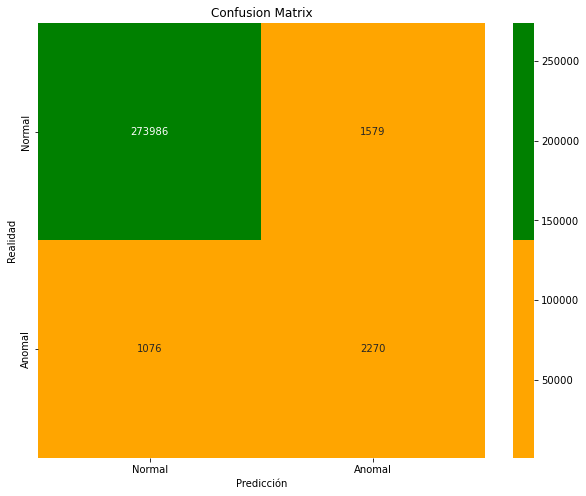

In [197]:
viz = visualization()
viz.draw_confusion_matrix(y_pd, predictions_class[:,14])

In [198]:
from sklearn.metrics import roc_auc_score
clase = y_full[:,-1].astype(int)
# Calcular el AUC para cada modelo utilizando la función roc_auc_score() de la biblioteca scikit-learn
LSTM_auc = roc_auc_score(clase, predictions_class[:,14])

In [199]:
test_timedelta.reset_index(inplace=True)

In [202]:
predictions_class_pd = pd.concat([test_timedelta, predictions_class_pd], axis = 1 , join = "inner")

In [203]:
anomalies = predictions_class_pd.loc[predictions_class_pd['class'] == 1.0,['timedelta']]

In [204]:
test_data_pd = pd.DataFrame(test_data, columns=['bx_gse', 'by_gse', 'bz_gse', 'theta_gse',
       'phi_gse', 'bx_gsm', 'by_gsm', 'bz_gsm', 'theta_gsm', 'phi_gsm', 'bt',
       'density', 'speed', 'temperature'])
test_data_pd = pd.concat([test_timedelta, test_data_pd], axis = 1 , join = "inner")

In [205]:
output = test_data_pd[test_data_pd['timedelta'].isin(anomalies['timedelta'])]
output = output.round(3)

In [206]:
output = output.drop(['index'], axis=1)

In [207]:
from reportlab.lib.pagesizes import A4
from reportlab.lib.units import inch
from reportlab.pdfgen import canvas
from reportlab.lib import colors
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.platypus import Table, TableStyle

pdf = canvas.Canvas("Reporte de Anomalías.pdf", pagesize=A4)
page_width, page_height = A4
inch = 72  #32
df = output

data = [df.columns.tolist()] + df.values.tolist()

styles = getSampleStyleSheet()
style_table = TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), colors.grey),
    ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
    ('FONTSIZE', (0, 0), (-1, 0), 6),
    ('BOTTOMPADDING', (0, 0), (-1, 0),12),
    ('BACKGROUND', (0, 1), (-1, -1), colors.lightgreen),
    ('GRID', (0, 0), (-1, -1), 1, colors.black),
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
    ('VALIGN', (0, 0), (-1, -1), 'MIDDLE'),
    ('FONTNAME', (0, 1), (-1, -1), 'Helvetica'),
    ('FONTSIZE', (0, 1), (-1, -1), 6),
    ('BOTTOMPADDING', (0, 1), (-1, -1), 6),
])

num_rows = len(data)
num_cols = len(data[0])

max_rows_per_page = int((page_height - 5.5 * inch) / (12 * 1.2)) - 1

num_pages = int(num_rows / max_rows_per_page) + 1

for page in range(num_pages):
    # Título en la primera página
    if page == 0:
        pdf.setFont("Helvetica-Bold", 16)
        pdf.drawString(inch, page_height - inch, "Reporte de anomalías detectadas")
        pdf.drawString(inch, page_height - inch+18, "INVAP")

    # Agrego la matriz de confusión
        pdf.setFont("Helvetica", 11)
        pdf.drawString(inch, page_height - inch-20, "La matriz de confusión obtenida con el modelo seleccionado es la siguiente:")
        pdf.drawImage("confusion_matrix.jpg", 100, 360, width=5*inch, height=5*inch)
        #pdf.drawImage("confusion_matrix.jpg", 100, 400, width=350, height=350) #, width=3*inch, height=3*inch)

    # Agrego resultados de AUC
        pdf.drawString(inch, 300, f"AUC de Restricted Bolztmann Machine: {LSTM_auc}")
        pdf.setFont("Helvetica", 8)
        pdf.drawString(inch, inch+24, "Informe de anormalidades detectadas")
        pdf.drawString(inch, inch+12, "Especialización en Inteligencia Artificial")
        pdf.drawString(inch, inch, "Ing. Raúl Blanco Elicabe")
        pdf.drawString(inch+420, inch, f"Página {page+1}")
        pdf.showPage()
    if page > 0:
    # Pie de página en todas las páginas
        pdf.setFont("Helvetica", 8)
        pdf.drawString(inch, inch+24, "Informe de anormalidades detectadas")
        pdf.drawString(inch, inch+12, "Especialización en Inteligencia Artificial")
        pdf.drawString(inch, inch, "Ing. Raúl Blanco Elicabe")
        pdf.drawString(inch+420, inch, f"Página {page+1}")


        start_row = (page-1) * max_rows_per_page
        end_row = min((page) * max_rows_per_page, num_rows)

        page_data = data[start_row:end_row]

        table = Table(page_data,colWidths=[0.75 * inch, 0.4 * inch, 0.4 * inch, 0.4 * inch, 0.4 * inch, 0.4 * inch, 0.4 * inch, 0.4 * inch, 0.4 * inch, 0.4 * inch, 0.4 * inch, 0.4 * inch, 0.4 * inch, 0.4 * inch, 0.4 * inch])
        
        table.setStyle(style_table)

        table.wrapOn(pdf, page_width - 2 * inch, page_height - 2 * inch)
        table.drawOn(pdf, inch, page_height - 10 * inch - 12 * 1.2)

        if page < num_pages - 1:
            pdf.showPage()

pdf.save()
